## Train Agent on Osu Environment using PPO LSTM

In [1]:
from environment import OsuEnvironment
from ppo_agent import PPO_Agent
from model import LSTM_Actor, LSTM_Critic
import torch
import torch.nn as nn
import torch.optim as optim
import os
import warnings
import logging

if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5
    !pip install -r yolov5/requirements.txt

warnings.simplefilter("ignore", FutureWarning)
logging.getLogger('ultralytics').setLevel(logging.ERROR)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# define arguments for Agent
env = OsuEnvironment(num_frame=8)
behavior_cloning = True
hidden_size = 128
num_layer = 2
dropout = 0.1
batch_size = 64
n_epoch = 5

actor_net = LSTM_Actor(env.observation_space, env.action_space.nvec, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)
critic_net = LSTM_Critic(env.observation_space, hidden_size=hidden_size, num_layer=num_layer, dropout=dropout).to(device)

actor_optimizer = optim.Adam(actor_net.parameters(), lr=0.001)
critic_optimizer = optim.Adam(critic_net.parameters(), lr=0.001)

agent = PPO_Agent(env=env, 
                  actor_net=actor_net, 
                  critic_net=critic_net,
                  actor_optimizer=actor_optimizer, 
                  critic_optimizer=critic_optimizer, 
                  batch_size=batch_size,
                  n_epoch=n_epoch, 
                  behavior_cloning=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\bohui/.cache\torch\hub\master.zip
YOLOv5  2024-12-1 Python-3.11.5 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Listening on 127.0.0.1:5555


In [6]:
agent.pretrain(total_episode=100)

Episod 10, pre-training loss: 0.011241778530675466
Episod 20, pre-training loss: 0.009902280405471753
Episod 30, pre-training loss: 0.009381149266846552
Episod 40, pre-training loss: 0.00944253384358272
Episod 50, pre-training loss: 0.008640139124382445
Episod 60, pre-training loss: 0.00818622556411229
Episod 70, pre-training loss: 0.008157030377887575
Episod 80, pre-training loss: 0.007600815957155663
Episod 90, pre-training loss: 0.0077007535410267515
Episod 100, pre-training loss: 0.0074329381646059435


In [4]:
agent.eval(pretrain=True)

Accuracy:  0.9673865544285747


In [5]:
agent.eval(total_episode=1)

In [10]:
agent.train(total_episode=100, c=0.02)

Episode 10: Total Reward: -971, Loss: 0.0938193001926733
Episode 20: Total Reward: -83, Loss: 0.09783223206625995
Episode 30: Total Reward: -144, Loss: 0.09404613534952426
Episode 40: Total Reward: -1090, Loss: 0.0938858488265026
Episode 50: Total Reward: -1405, Loss: 0.09010418057644884
Episode 60: Total Reward: -613, Loss: 0.09446117640640116
Episode 70: Total Reward: -2050, Loss: 0.08929986192412435
Episode 80: Total Reward: -80, Loss: 0.09573339838727321
Episode 90: Total Reward: -5, Loss: 0.09500471999395074
Episode 100: Total Reward: -1193, Loss: 0.0942850376955999


In [13]:
%matplotlib inline

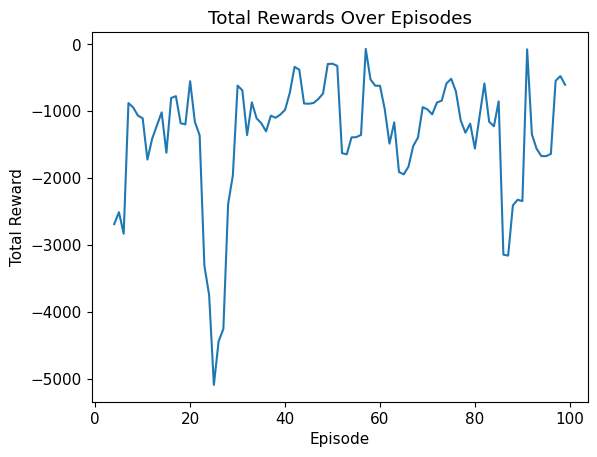

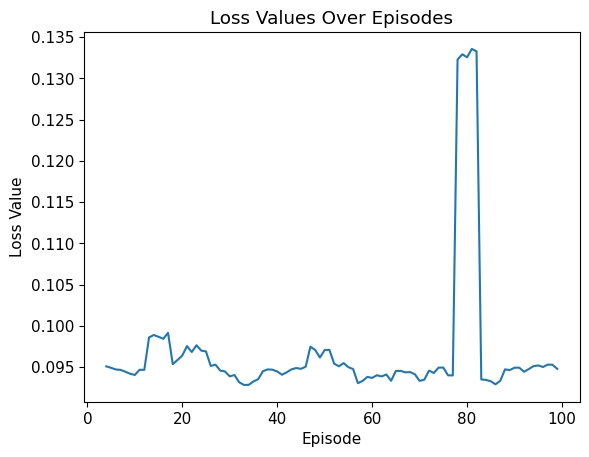

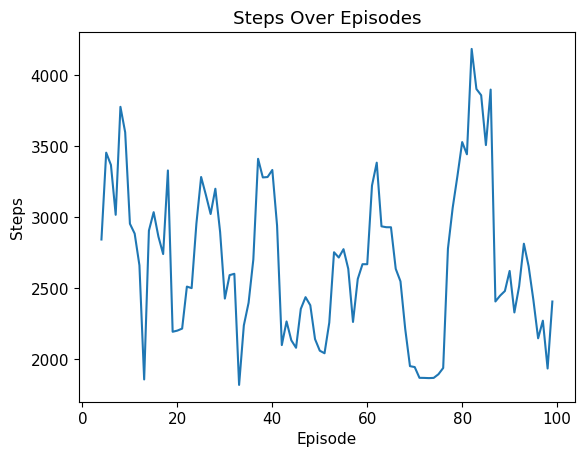

In [14]:
agent.plot()

In [17]:
agent.saveModel("ppo")

Model Saved


In [3]:
agent.loadModel("ppo")

Model Loaded


In [ ]:
agent.eval(total_episode=10)